In [1]:
import sys
import h2o
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.estimators.deeplearning import H2OAutoEncoderEstimator
from h2o.estimators.deeplearning import H2ODeepLearningEstimator
from h2o.grid.grid_search import H2OGridSearch
import statistics
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; OpenJDK 64-Bit Server VM (build 25.152-b12, mixed mode)56-b12)
  Starting server from C:\Anaconda\lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\HP\AppData\Local\Temp\tmpoo9k45vy
  JVM stdout: C:\Users\HP\AppData\Local\Temp\tmpoo9k45vy\h2o_HP_started_from_python.out
  JVM stderr: C:\Users\HP\AppData\Local\Temp\tmpoo9k45vy\h2o_HP_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O cluster uptime:,03 secs
H2O cluster timezone:,Europe/Belgrade
H2O data parsing timezone:,UTC
H2O cluster version:,3.24.0.5
H2O cluster version age:,"21 days, 21 hours and 1 minute"
H2O cluster name:,H2O_from_python_HP_9jkcnt
H2O cluster total nodes:,1
H2O cluster free memory:,1.757 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"accepting new members, healthy"


In [3]:
files_train = ["train_FD001.txt", "train_FD002.txt", "train_FD003.txt", "train_FD004.txt"]
df_train = h2o.import_file(files_train)
files_test = ["test_FD001.txt", "test_FD002.txt", "test_FD003.txt", "test_FD004.txt"]
df_test = h2o.import_file(files_test)

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [4]:
df_test.shape

(104897, 26)

In [5]:
len(df_train)/len(df_test) #train 1.5x więcej

1.5287281809775304

In [6]:
measurements = ["measure"+str(i) for i in range(1,22)]

In [7]:
columns = ['Unit nr', 'time', 'set1', 'set2', 'set3']
columns.extend(measurements)
df_train.columns = columns
df_test.columns = columns

In [8]:
df_train.head(3)

Unit nr,time,set1,set2,set3,measure1,measure2,measure3,measure4,measure5,measure6,measure7,measure8,measure9,measure10,measure11,measure12,measure13,measure14,measure15,measure16,measure17,measure18,measure19,measure20,measure21
1,1,-0.0007,-0.0004,100,518.67,641.82,1589.7,1400.6,14.62,21.61,554.36,2388.06,9046.19,1.3,47.47,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100,39.06,23.419
1,2,0.0019,-0.0003,100,518.67,642.15,1591.82,1403.14,14.62,21.61,553.75,2388.04,9044.07,1.3,47.49,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100,39,23.4236
1,3,-0.0043,0.0003,100,518.67,642.35,1587.99,1404.2,14.62,21.61,554.26,2388.08,9052.94,1.3,47.27,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100,38.95,23.3442


In [9]:
df_test.head(2)

Unit nr,time,set1,set2,set3,measure1,measure2,measure3,measure4,measure5,measure6,measure7,measure8,measure9,measure10,measure11,measure12,measure13,measure14,measure15,measure16,measure17,measure18,measure19,measure20,measure21
1,1,0.0023,0.0003,100,518.67,643.02,1585.29,1398.21,14.62,21.61,553.9,2388.04,9050.17,1.3,47.2,521.72,2388.03,8125.55,8.4052,0.03,392,2388,100,38.86,23.3735
1,2,-0.0027,-0.0003,100,518.67,641.71,1588.45,1395.42,14.62,21.61,554.85,2388.01,9054.42,1.3,47.5,522.16,2388.06,8139.62,8.3803,0.03,393,2388,100,39.02,23.3916


In [10]:
df_test[5:26]

measure1,measure2,measure3,measure4,measure5,measure6,measure7,measure8,measure9,measure10,measure11,measure12,measure13,measure14,measure15,measure16,measure17,measure18,measure19,measure20,measure21
518.67,643.02,1585.29,1398.21,14.62,21.61,553.9,2388.04,9050.17,1.3,47.2,521.72,2388.03,8125.55,8.4052,0.03,392,2388,100,38.86,23.3735
518.67,641.71,1588.45,1395.42,14.62,21.61,554.85,2388.01,9054.42,1.3,47.5,522.16,2388.06,8139.62,8.3803,0.03,393,2388,100,39.02,23.3916
518.67,642.46,1586.94,1401.34,14.62,21.61,554.11,2388.05,9056.96,1.3,47.5,521.97,2388.03,8130.1,8.4441,0.03,393,2388,100,39.08,23.4166
518.67,642.44,1584.12,1406.42,14.62,21.61,554.07,2388.03,9045.29,1.3,47.28,521.38,2388.05,8132.9,8.3917,0.03,391,2388,100,39,23.3737
518.67,642.51,1587.19,1401.92,14.62,21.61,554.16,2388.01,9044.55,1.3,47.31,522.15,2388.03,8129.54,8.4031,0.03,390,2388,100,38.99,23.413
518.67,642.11,1579.12,1395.13,14.62,21.61,554.22,2388,9050.96,1.3,47.26,521.92,2388.08,8127.46,8.4238,0.03,392,2388,100,38.91,23.3467
518.67,642.11,1583.34,1404.84,14.62,21.61,553.89,2388.05,9051.39,1.3,47.31,522.01,2388.06,8134.97,8.3914,0.03,391,2388,100,38.85,23.3952
518.67,642.54,1580.89,1400.89,14.62,21.61,553.59,2388.05,9052.86,1.3,47.21,522.09,2388.06,8125.93,8.4213,0.03,393,2388,100,39.05,23.3224
518.67,641.88,1593.29,1412.28,14.62,21.61,554.49,2388.06,9048.55,1.3,47.37,522.03,2388.05,8134.15,8.4353,0.03,391,2388,100,39.1,23.4521
518.67,642.07,1585.25,1398.64,14.62,21.61,554.28,2388.04,9051.95,1.3,47.14,522,2388.06,8134.08,8.4093,0.03,391,2388,100,38.87,23.382


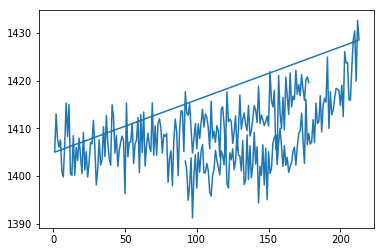

In [11]:
pd = df_train.as_data_frame()
plt.plot(pd["time"][10000:10300], pd["measure4"][10000:10300]) #przykładowa wizualizacja zmian pomiaru 4
plt.show()

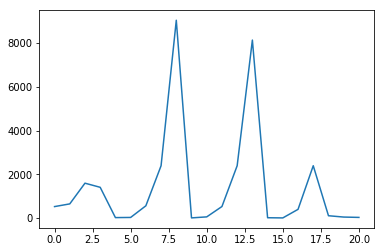

In [12]:
plt.plot(pd[:1].values.tolist()[0][5:])  #pomiary w pierwszej sec

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000210CC701FD0>,
      dtype=object)

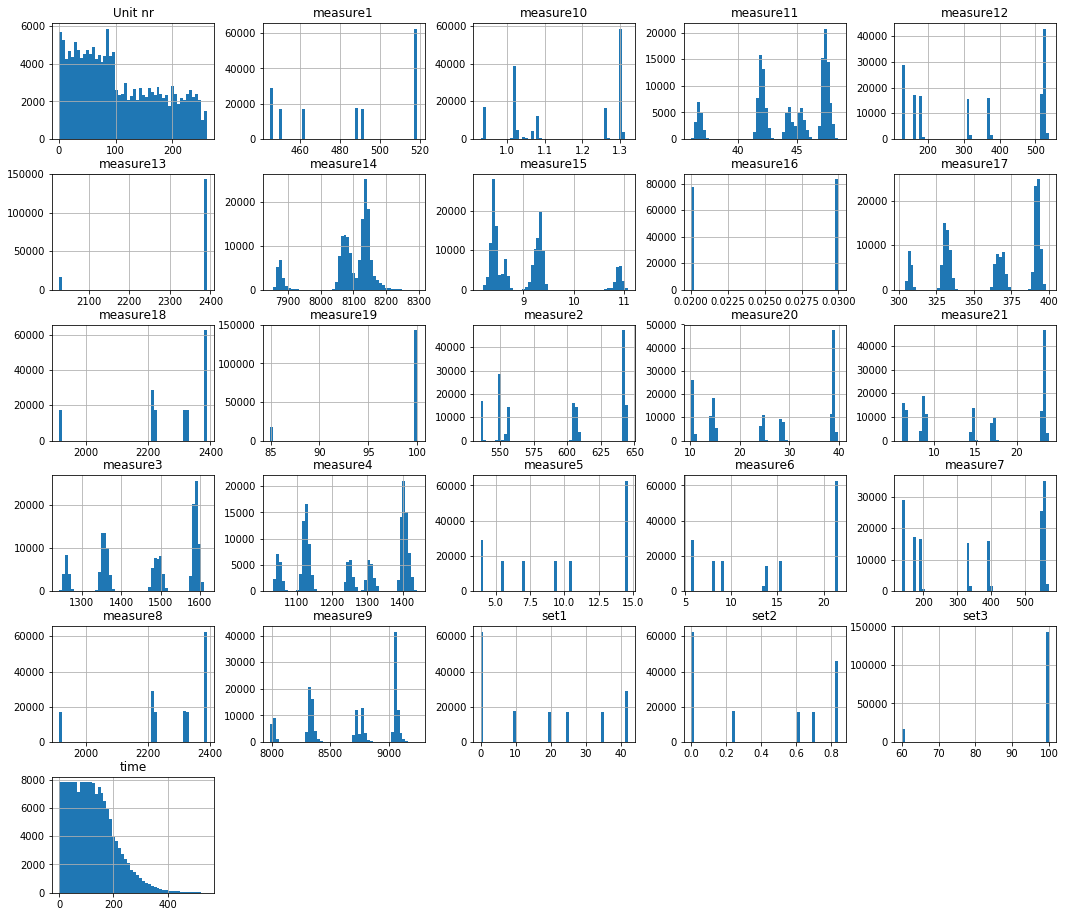

In [20]:
pd.hist(bins=50, figsize=(18,16))


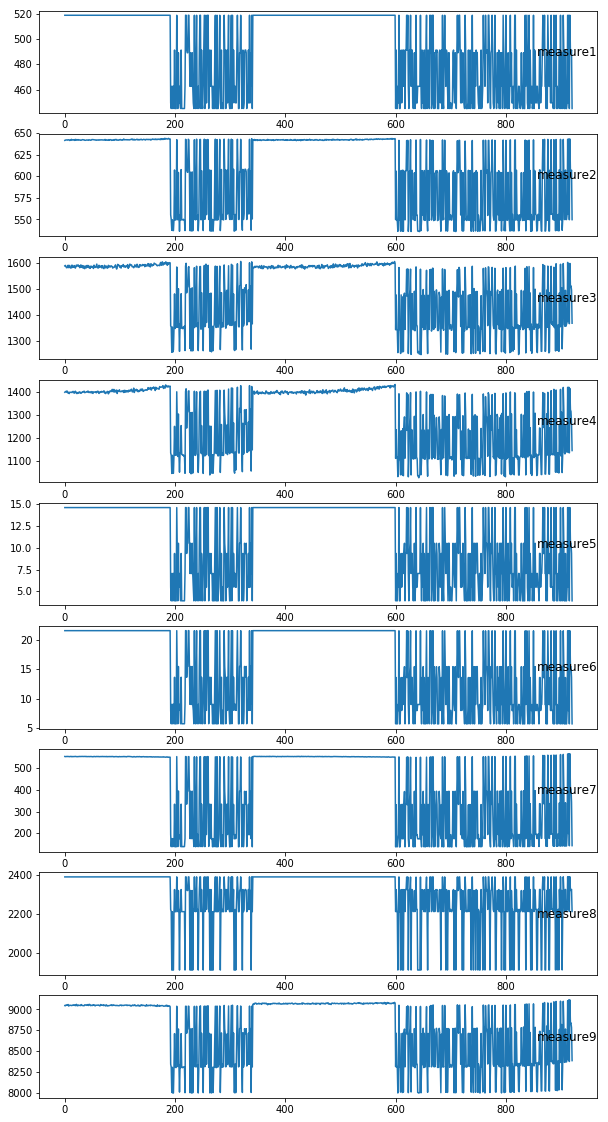

In [25]:
values = pd[pd["Unit nr"]==1].values
groups = [5, 6, 7, 8, 9, 10, 11,12,13]
i = 1
plt.figure(figsize=(10,20))
for group in groups:
	plt.subplot(len(groups), 1, i)
	plt.plot(values[:, group])
	plt.title(pd.columns[group], y=0.5, loc='right')
	i += 1
plt.show()

In [ ]:
''' 1 attitude '''
x=df_train["time"]
y=df_train[5:26]
model1 = H2ODeepLearningEstimator(hidden=[500, 500], nfolds=10, epochs=6)
model1.train(x=x, y=df_train) 

In [ ]:
anomaly_model = H2OAutoEncoderEstimator( 
        activation="Tanh", 
        hidden=[50,50,50], 
        sparse=True,
        l1=1e-4, 
        epochs=5)
anomaly_model.train(x=df_train.names,  
        training_frame=df_train)                

In [ ]:
'''GradientBoostingEstimator'''
model = H2OGradientBoostingEstimator(distribution='bernoulli',
                                    ntrees=100,
                                    max_depth=4,
                                    learn_rate=0.1)

In [ ]:
model.train(x="time", y=y, training_frame=df_train, validation_frame=df_test)

In [ ]:
'''GRID SEARCH '''
hidden_opt = [[17,32],[8,19],[32,16,8],[100],[10,10,10,10]]
l1_opt = [s/1e6 for s in range(1,1001)]
hyper_parameters = {"hidden":hidden_opt, "l1":l1_opt}
search_criteria = {"strategy":"RandomDiscrete", 
    "max_models":10, "max_runtime_secs":100, 
    "seed":123456}

model_grid = H2OGridSearch(H2ODeepLearningEstimator, 
    hyper_params=hyper_parameters, 
    search_criteria=search_criteria)
model_grid.train(x="time", y="set1", 
    distribution="multinomial", epochs=1000,
    training_frame=df_train, validation_frame=df_test,
    score_interval=2, stopping_rounds=3, 
    stopping_tolerance=0.05, 
    stopping_metric="misclassification")

In [ ]:
for model in model_grid:
    print (model.model_id + " mse: " + str(model.mse()))